In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss10delay50bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

In [27]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss20delay50bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [28]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss30delay50bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [29]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,95,90)loss10delay50bw100 (avg).json', 'r') as file:
    json_data_data_3 = json.load(file)

# Convert JSON data to DataFrame
df_data_3 = pd.DataFrame(json_data_data_3)

In [30]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,95,90)loss20delay50bw100 (avg).json', 'r') as file:
    json_data_data_4 = json.load(file)

# Convert JSON data to DataFrame
df_data_4 = pd.DataFrame(json_data_data_4)

In [31]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,95,90)loss30delay50bw100 (avg).json', 'r') as file:
    json_data_data_5 = json.load(file)

# Convert JSON data to DataFrame
df_data_5 = pd.DataFrame(json_data_data_5)

In [32]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,90,85)loss10delay50bw100 (avg).json', 'r') as file:
    json_data_data_6 = json.load(file)

# Convert JSON data to DataFrame
df_data_6 = pd.DataFrame(json_data_data_6)

In [33]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,90,85)loss20delay50bw100 (avg).json', 'r') as file:
    json_data_data_7 = json.load(file)

# Convert JSON data to DataFrame
df_data_7 = pd.DataFrame(json_data_data_7)

In [34]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,90,85)loss30delay50bw100 (avg).json', 'r') as file:
    json_data_data_8 = json.load(file)

# Convert JSON data to DataFrame
df_data_8 = pd.DataFrame(json_data_data_8)

In [35]:
# Extract the first index values for the single metrics
metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_render_time_difference_key_frame_preceding', 'avg_render_time_difference_key_frame_consecutive',
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_stall_duration_key_frame_preceding',
           'avg_stall_duration_key_frame_consecutive', 'avg_i_frames', 'avg_rendered_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

# Initialize dictionary to store metric values
metric_values = {metric: [] for metric in metrics}

# Extract values for each dataframe
for df in [df_data_0, df_data_3, df_data_6]:
    for metric in metrics:
        metric_values[metric].append(df[metric].iloc[0])

# Metrics Comparison
print("\n=== Metrics Comparison ===")
for metric in metrics:
    values = metric_values[metric]
    print("{}: {:.2f} vs {:.2f} vs {:.2f}".format(
        metric, values[0], values[1], values[2]
    ))


=== Metrics Comparison ===
avg_total_frames: 1800.67 vs 1800.33 vs 1800.00
avg_received_frames: 1789.67 vs 1797.33 vs 1795.00
avg_rendered_frames: 1772.00 vs 1786.33 vs 1782.33
avg_percentage_received_frames: 99.39 vs 99.83 vs 99.72
avg_skipped_frames: 28.67 vs 14.00 vs 17.67
avg_render_time_difference: 33.91 vs 33.60 vs 33.68
avg_render_time_difference_key_frame_preceding: 71.27 vs 62.88 vs 70.26
avg_render_time_difference_key_frame_consecutive: 35.04 vs 36.70 vs 36.90
avg_num_of_stall_events: 501.33 vs 534.33 vs 520.67
avg_stall_duration: 23295.00 vs 22059.67 vs 21919.33
avg_stall_duration_key_frame_preceding: 1510.67 vs 917.00 vs 1129.67
avg_stall_duration_key_frame_consecutive: 522.00 vs 389.67 vs 429.00
avg_i_frames: 38.67 vs 29.67 vs 29.67
avg_rendered_i_frames: 38.67 vs 29.67 vs 29.67
avg_gop_size_frames: 45.74 vs 59.70 vs 59.69
avg_gop_size_time: 1.56 vs 2.02 vs 2.02
avg_total_time: 149.16 vs 144.11 vs 142.69
avg_25th_percentile_total_time: 117.33 vs 115.67 vs 114.33
avg_50th_

In [36]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    '99,95': [
        df_data_0['avg_rendered_frames'].iloc[0]/df_data_0['avg_total_frames'].iloc[0] * 100,
        df_data_0['avg_skipped_frames'].iloc[0],
        df_data_0['avg_stall_duration'].iloc[0],
        df_data_0['avg_gop_size_time'].iloc[0],
        df_data_0['avg_total_time'].iloc[0]
    ],
    '95,90': [
        df_data_3['avg_rendered_frames'].iloc[0]/df_data_3['avg_total_frames'].iloc[0] * 100,
        df_data_3['avg_skipped_frames'].iloc[0],
        df_data_3['avg_stall_duration'].iloc[0],
        df_data_3['avg_gop_size_time'].iloc[0],
        df_data_3['avg_total_time'].iloc[0]
    ],
    '90,85': [
        df_data_6['avg_rendered_frames'].iloc[0]/df_data_6['avg_total_frames'].iloc[0] * 100,
        df_data_6['avg_skipped_frames'].iloc[0],
        df_data_6['avg_stall_duration'].iloc[0],
        df_data_6['avg_gop_size_time'].iloc[0],
        df_data_6['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Stall Duration (ms)', 'GoP Size (s)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
print('10% Loss')
table


10% Loss


,"99,95","95,90","90,85"
Frame Render Rate (%),98.41,99.22,99.02
Number of Skipped Frames,28.67,14.00,17.67
Stall Duration (ms),23295.00,22059.67,21919.33
GoP Size (s),1.56,2.02,2.02
Average Latency (ms),149.16,144.11,142.69


In [37]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    '99,95': [
        df_data_1['avg_rendered_frames'].iloc[0]/df_data_1['avg_total_frames'].iloc[0] * 100,
        df_data_1['avg_skipped_frames'].iloc[0],
        df_data_1['avg_stall_duration'].iloc[0],
        df_data_1['avg_gop_size_time'].iloc[0],
        df_data_1['avg_total_time'].iloc[0]
    ],
    '95,90': [
        df_data_4['avg_rendered_frames'].iloc[0]/df_data_4['avg_total_frames'].iloc[0] * 100,
        df_data_4['avg_skipped_frames'].iloc[0],
        df_data_4['avg_stall_duration'].iloc[0],
        df_data_4['avg_gop_size_time'].iloc[0],
        df_data_4['avg_total_time'].iloc[0]
    ],
    '90,85': [
        df_data_7['avg_rendered_frames'].iloc[0]/df_data_7['avg_total_frames'].iloc[0] * 100,
        df_data_7['avg_skipped_frames'].iloc[0],
        df_data_7['avg_stall_duration'].iloc[0],
        df_data_7['avg_gop_size_time'].iloc[0],
        df_data_7['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Stall Duration (ms)', 'GoP Size (s)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
print('20% Loss')
table


20% Loss


,"99,95","95,90","90,85"
Frame Render Rate (%),91.35,95.33,96.68
Number of Skipped Frames,155.67,84.00,59.67
Stall Duration (ms),31448.67,30283.00,31168.67
GoP Size (s),0.88,1.63,2.00
Average Latency (ms),182.28,188.00,200.12


In [38]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    '99,95': [
        df_data_2['avg_rendered_frames'].iloc[0]/df_data_2['avg_total_frames'].iloc[0] * 100,
        df_data_2['avg_skipped_frames'].iloc[0],
        df_data_2['avg_stall_duration'].iloc[0],
        df_data_2['avg_gop_size_time'].iloc[0],
        df_data_2['avg_total_time'].iloc[0]
    ],
    '95,90': [
        df_data_5['avg_rendered_frames'].iloc[0]/df_data_5['avg_total_frames'].iloc[0] * 100,
        df_data_5['avg_skipped_frames'].iloc[0],
        df_data_5['avg_stall_duration'].iloc[0],
        df_data_5['avg_gop_size_time'].iloc[0],
        df_data_5['avg_total_time'].iloc[0]
    ],
    '90,85': [
        df_data_8['avg_rendered_frames'].iloc[0]/df_data_8['avg_total_frames'].iloc[0] * 100,
        df_data_8['avg_skipped_frames'].iloc[0],
        df_data_8['avg_stall_duration'].iloc[0],
        df_data_8['avg_gop_size_time'].iloc[0],
        df_data_8['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Stall Duration (ms)', 'GoP Size (s)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
print('30% Loss')
table


30% Loss


,"99,95","95,90","90,85"
Frame Render Rate (%),80.14,75.09,89.26
Number of Skipped Frames,357.33,448.33,193.33
Stall Duration (ms),37260.67,39454.00,37180.00
GoP Size (s),0.59,0.56,1.39
Average Latency (ms),224.72,245.34,261.82


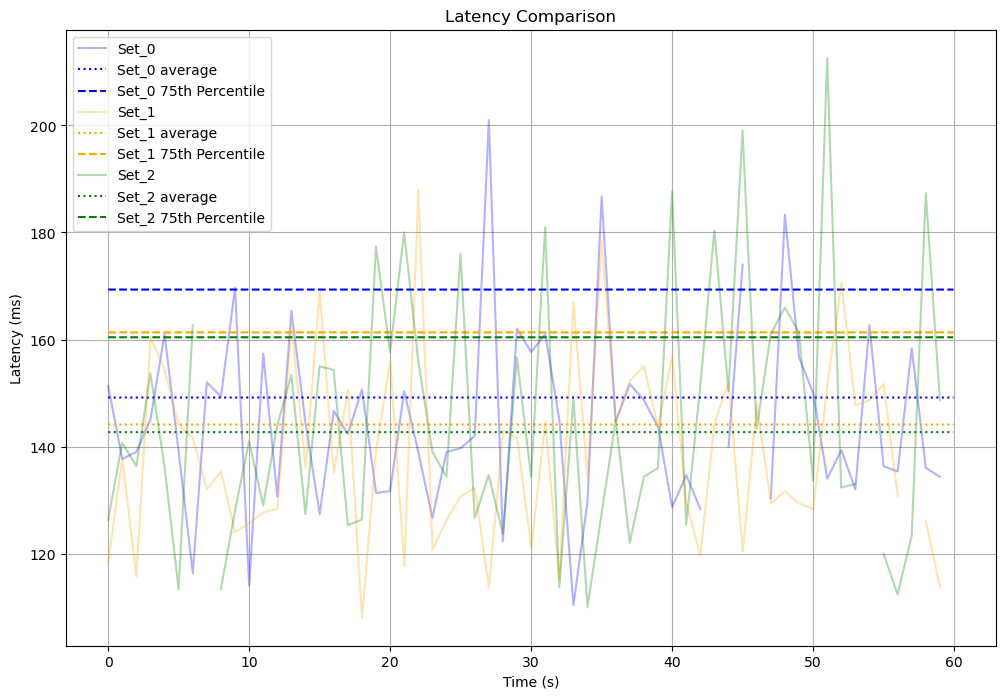

In [40]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_3['_1_rawVideoTimestamp']
timestamps_2 = df_data_6['_1_rawVideoTimestamp']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_3['_8_totalTime']
total_time_2 = df_data_6['_8_totalTime']

# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 30  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_3, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_6, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='Set_0', color='blue', alpha=0.3)
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_total_time'].iloc[0]] * len(df_data_0), label='Set_0 average', color='blue', linestyle='dotted')
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_0), label='Set_0 75th Percentile', color='blue', linestyle='dashed')

plt.plot(timestamps_1, smoothed_1, label='Set_1', color='orange', alpha=0.3)
plt.plot(df_data_3['_1_rawVideoTimestamp'], [df_data_3['avg_total_time'].iloc[0]] * len(df_data_3), label='Set_1 average', color='orange', linestyle='dotted')
plt.plot(df_data_3['_1_rawVideoTimestamp'], [df_data_3['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_3), label='Set_1 75th Percentile', color='orange', linestyle='dashed')

plt.plot(timestamps_2, smoothed_2, label='Set_2', color='green', alpha=0.3)
plt.plot(df_data_6['_1_rawVideoTimestamp'], [df_data_6['avg_total_time'].iloc[0]] * len(df_data_6), label='Set_2 average', color='green', linestyle='dotted')
plt.plot(df_data_6['_1_rawVideoTimestamp'], [df_data_6['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_6), label='Set_2 75th Percentile', color='green', linestyle='dashed')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
